In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import yfinance as yf

## Cosign Similarity (Find the similiar pattern to recent 30days)

In [126]:
TSLA = yf.Ticker('TSLA').history(interval='1d',period='5y').reset_index()
TSLA['Date']=TSLA['Date'].dt.date
TSLA.sort_values(by='Date', ascending=False, inplace=True)
TSLA.reset_index(drop=True,inplace=True)

In [118]:
TSLA_sector = yf.Ticker('TSLA').info['sector']
TSLA_industry = yf.Ticker('TSLA').info['industry']
TSLA_sector,TSLA_industry

('Consumer Cyclical', 'Auto Manufacturers')

In [ ]:
def cosign_similiarity(x,y) :
    return np.dot(x,y) / (np.sqrt(np.dot(x,x)) * np.sqrt(np.dot(y,y)))

def normalize(df) : 
    return ((df['Close'] - df['Close'].min())/(df['Close'].max()-df['Close'].min()))

In [119]:
#Normalize
base_df=TSLA.iloc[0:30][['Date','Close']]
base_df_norm=normalize(base_df)

In [128]:
#Window_size/Predict/Moving_Cnt
indow_size = len(base_df)
predict_date=5
moving_cnt=len(TSLA)-window_size-predict_date-1

In [152]:
#Cosign Similiarty
sim_list = []
for i in range(moving_cnt) :
    target = TSLA[i:i+window_size]
    target_norm = normalize(target)
    cos_similiarity = cosign_similiarity(base_df_norm,target_norm)
    sim_list.append(cos_similiarity)

In [189]:
pd.Series(sim_list).sort_values(ascending=False).head(5)

0      1.000000
618    0.937913
1      0.934714
310    0.928298
619    0.928231
dtype: float64

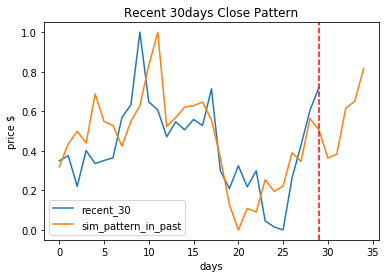

In [191]:
plt.plot(base_df_norm.values)

idx = 310
sim_df=TSLA[idx:idx+window_size+predict_date]
sim_df_norm = normalize(sim_df)
plt.plot(sim_df_norm.values)
plt.title('Recent 30days Close Pattern')
plt.axvline(x=window_size-1,color='red',linestyle='--')
plt.xlabel('days')
plt.ylabel('price $')
plt.legend(['recent_30','sim_pattern_in_past'])